### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

## Loading Dataset

In [2]:
# Load the dataset
data = pd.read_csv('/Users/atharvalambhate/Downloads/day.csv')

In [3]:
print(data.head())
print(data.info())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

In [4]:
print(data.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.5448

## Data Preparation

In [5]:
print(data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['weathersit'] = data['weathersit'].map({
    1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Snow/Rain'
})

In [7]:
data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [8]:
print(data.isnull().sum())

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


## Exploratory Data Analysis

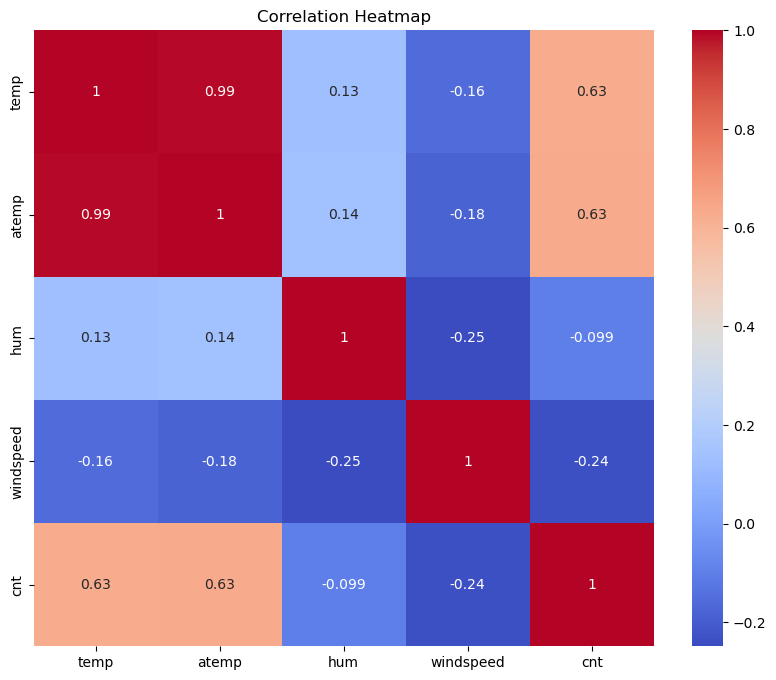

In [9]:
selected_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation_matrix = data[selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


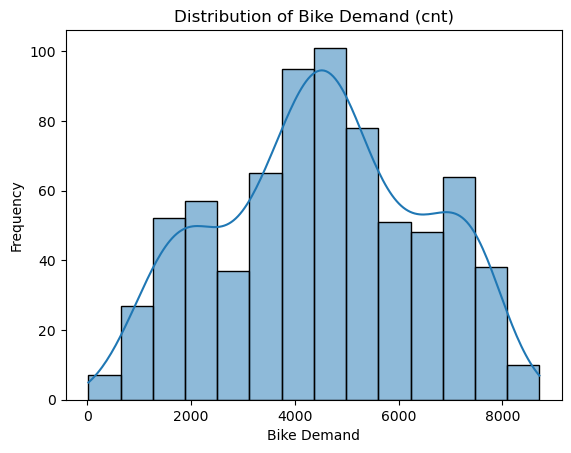

In [10]:
sns.histplot(data['cnt'], kde=True)
plt.title('Distribution of Bike Demand (cnt)')
plt.xlabel('Bike Demand')
plt.ylabel('Frequency')
plt.show()

## One-Hot Encoding for categorical features

In [11]:
X = data.drop(['cnt'], axis=1)  # Independent variables
y = data['cnt']                # Target variable

X = pd.get_dummies(X, columns=['season', 'weathersit'], drop_first=True)

## Splitting dataset into training and test-sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (511, 14), Test set size: (219, 14)


## Feature Scaling

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model building using Linear Regression

In [14]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print("Linear regression model trained successfully.")

Linear regression model trained successfully.


## Predictions

In [15]:
y_pred = lr.predict(X_test_scaled)
print(X_test_scaled)  


[[ 0.95971487 -0.75753454 -0.16783627 ... -0.5781035  -0.17390209
  -0.72796986]
 [-1.04197614 -0.46472051 -0.16783627 ... -0.5781035  -0.17390209
  -0.72796986]
 [-1.04197614  0.99934965 -0.16783627 ...  1.72979406 -0.17390209
  -0.72796986]
 ...
 [ 0.95971487  0.12090755 -0.16783627 ... -0.5781035  -0.17390209
   1.37368324]
 [-1.04197614 -0.46472051 -0.16783627 ... -0.5781035  -0.17390209
   1.37368324]
 [-1.04197614  1.29216368  5.95818764 ...  1.72979406 -0.17390209
  -0.72796986]]


## Model Prediction

In [16]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared score on test data: {r2}")


R-squared score on test data: 0.8241514931764605


## Residual Analysis

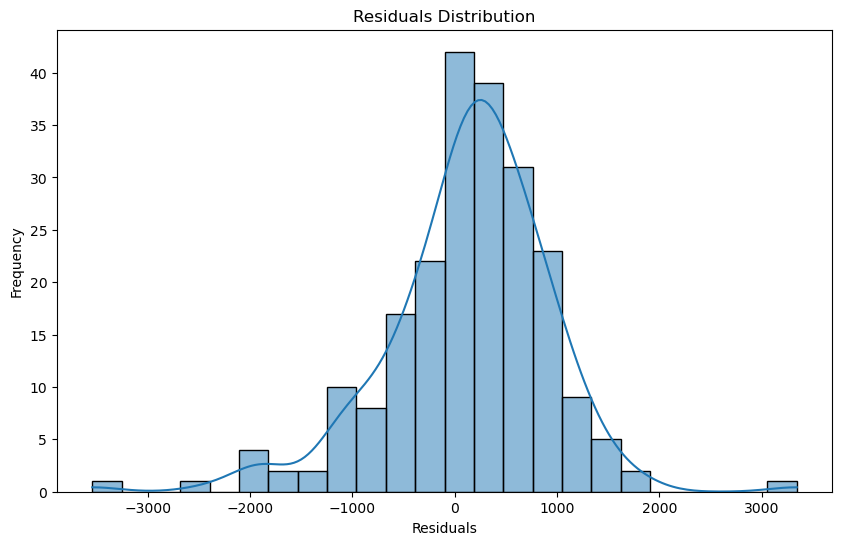

In [17]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()